## Initialize 

In [7]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz 
import math

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,8.0]

## Compute

In [6]:
# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi


Omegam0 = 0.3075
H0 = 67.74
Omegab = 0.0486
Omegac = 0.2589
Omegac + Omegab
omega_b = Omegab*(H0/100.)**2
omega_c = Omegac*(H0/100.)**2
hparam = H0/100.
maniyar_cosmo = {
'omega_b': omega_b,
'omega_cdm':  omega_c,
'h': H0/100.,
'ln10^{10}A_s': 3.048,
'n_s': 0.9665,

'm_ncdm': 0.0,
'cosmo_model': 1, # set to 1 for mnu-LCDM emulators and set mnu to 0. 
}

In [3]:
%%time
class_sz = Class_sz()
class_sz.set({'output':'cib_cib_1h,cib_cib_2h'})
class_sz.set(maniyar_cosmo)
class_sz.set({

'mass_function' : 'T08M200c',
'use_maniyar_cib_model':1,

'maniyar_cib_etamax' : 5.12572945e-01,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most_efficient_halo_mass_in_Msun' : 5.34372069e+12,
'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
#for the Lsat tabulation:
'freq_min': 9e1,
'freq_max': 8.57e2,
'dlogfreq' : 0.1,

'concentration_parameter':'fixed', # this sets it to 5

'n_z_L_sat' :100,
'n_m_L_sat' :100,
'n_nu_L_sat':100,

'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
'M_min' : 1e8*hparam,
'M_max' : 1e15*hparam,
'z_min' : 0.012,
'z_max' : 10.,
'ell_min': 10.,
'ell_max':5e4,
'dlogell':0.3,


'ndim_redshifts': 210,
'ndim_masses':150,

'has_cib_flux_cut': 0,
'hm_consistency':0,

'epsabs_L_sat': 1e-40,
'epsrel_L_sat': 1e-9,
    
'damping_1h_term':0,

# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
})

class_sz.set({
       'cib_frequency_list_num' : 6,
       'cib_frequency_list_in_GHz' : '100,143,217,353,545,857',
      })

CPU times: user 259 µs, sys: 431 µs, total: 690 µs
Wall time: 788 µs


True

In [4]:
%%time
class_sz.compute_class_szfast()

/Users/boris/Work/CLASS-SZ/SO-SZ/mcfit/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


CPU times: user 5min 10s, sys: 3.49 s, total: 5min 14s
Wall time: 39.6 s


## Plot

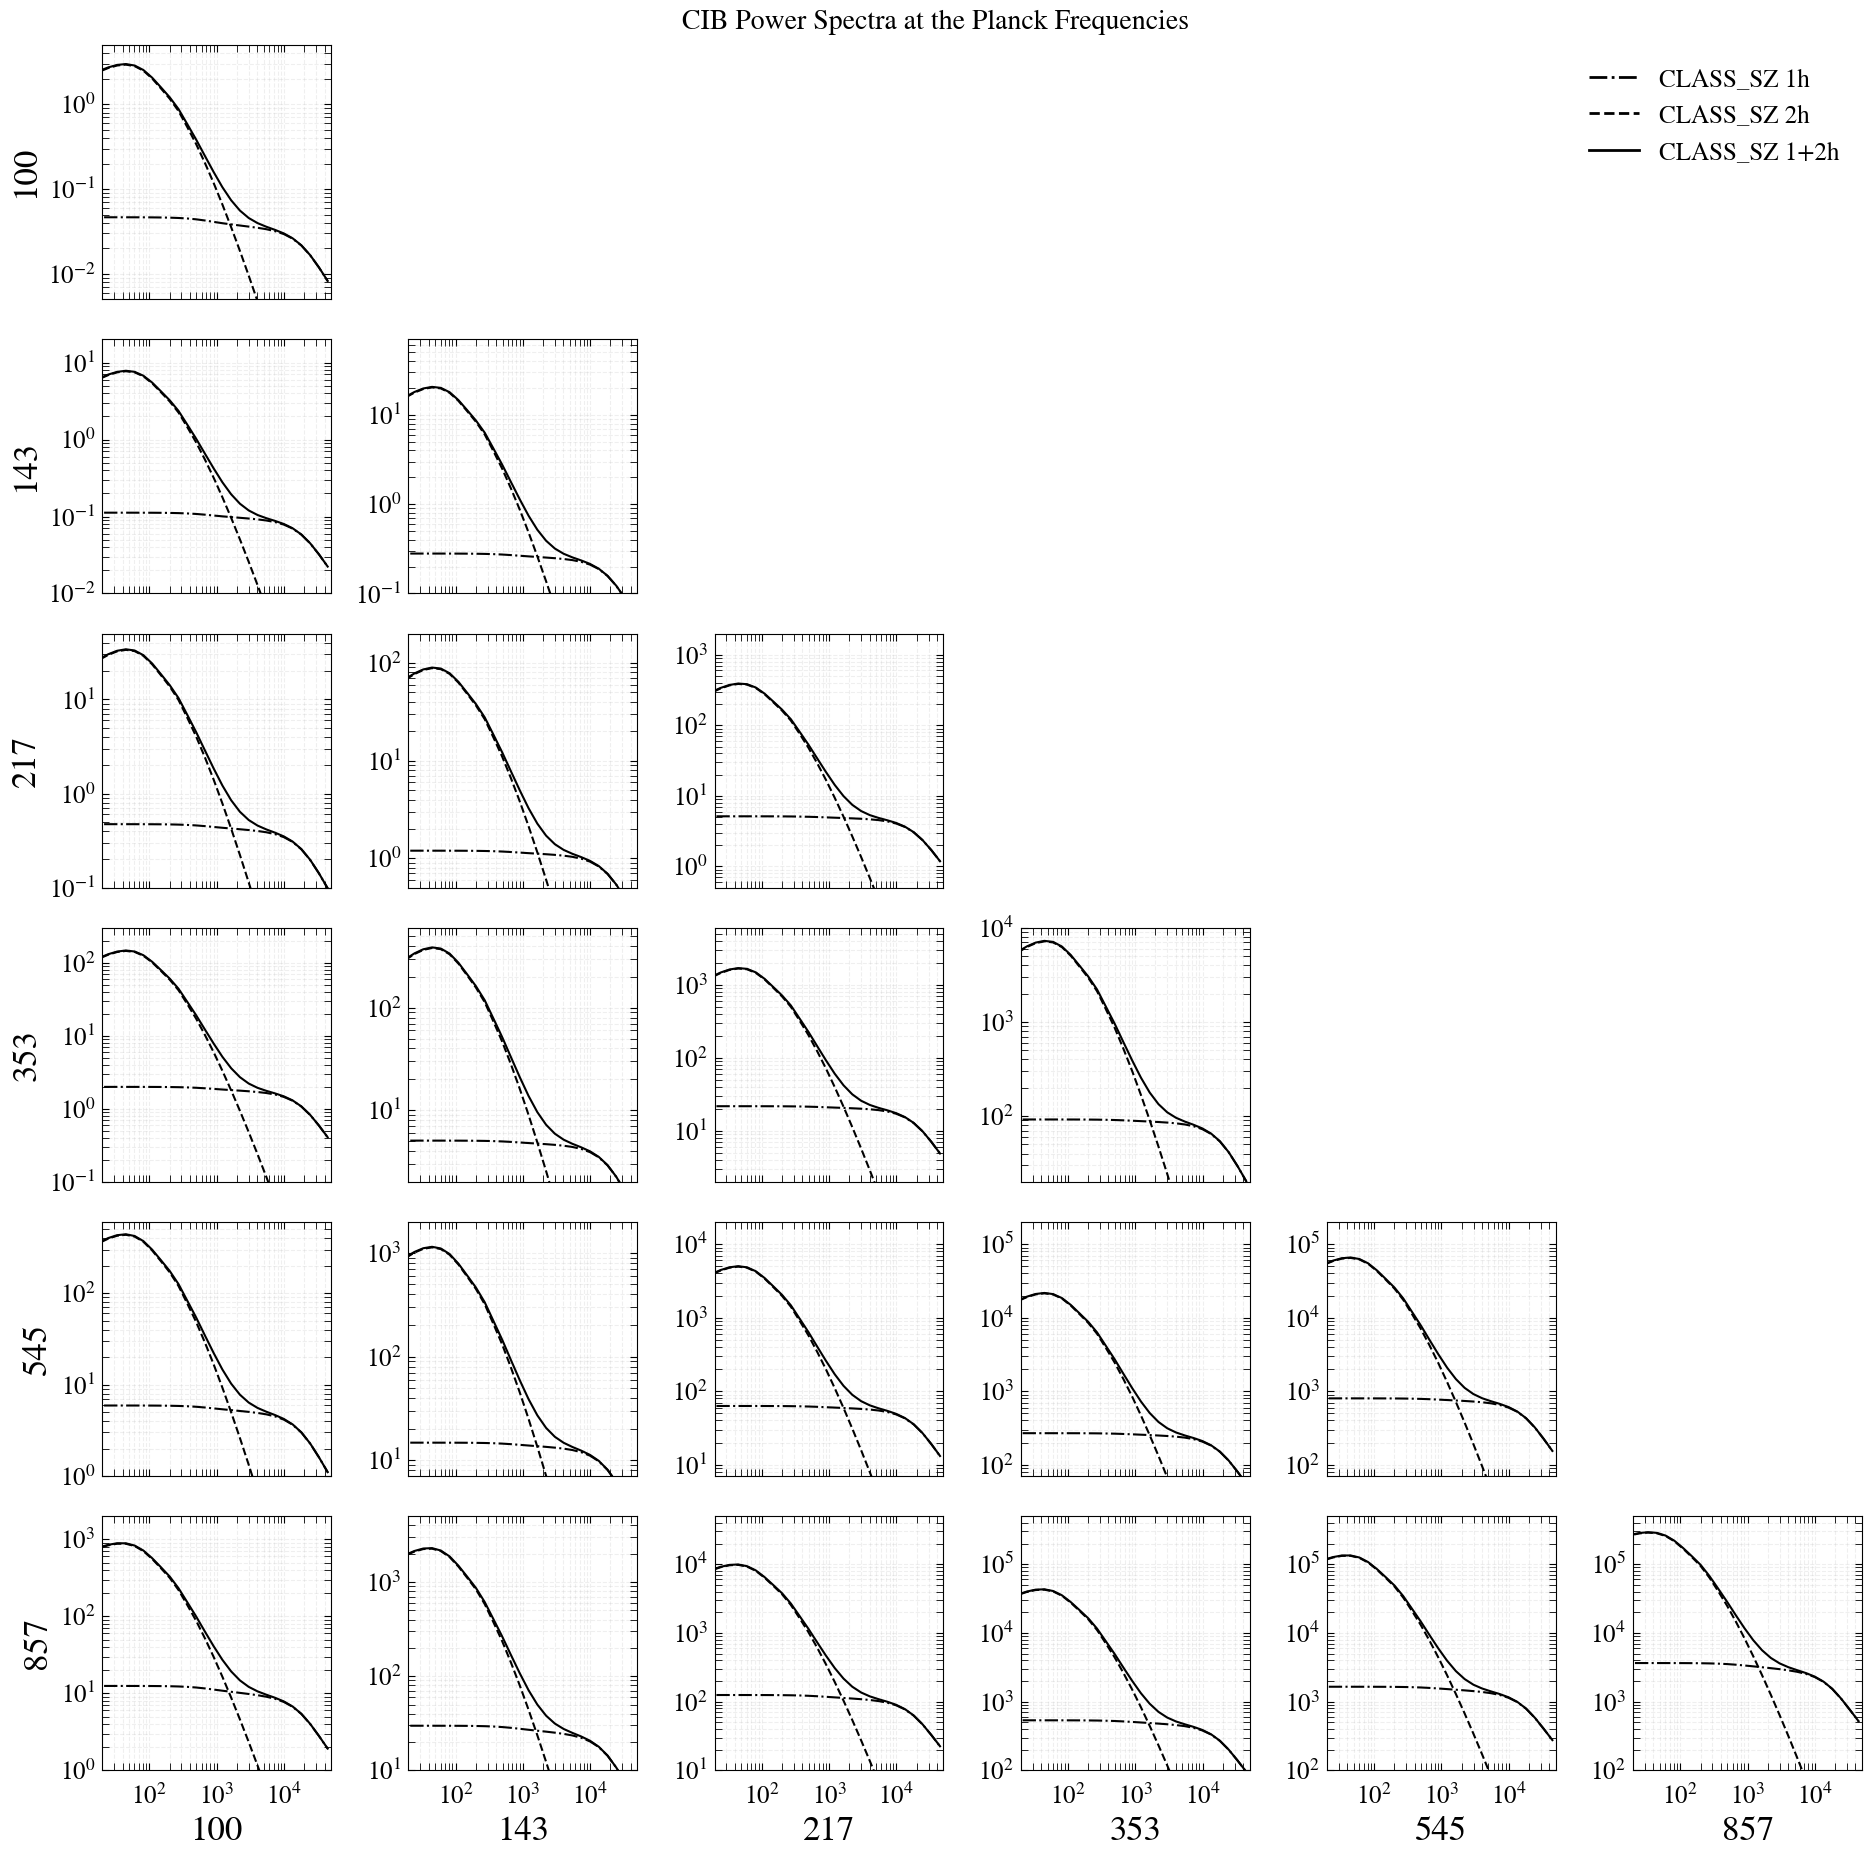

In [5]:
Planck = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }

from matplotlib.lines import Line2D
cl_cib_cib = class_sz.cl_cib_cib()
freq = ['100', '143', '217', '353', '545', '857']
# freq = ['545']
# nu1, nu2 = 4, 4
# plot_Cell(ell, cl1h_cib, cl2h_cib, nu1, nu2, freq, 'CIB')
# two_halo = cl2h_cib
# one_halo = cl1h_cib
faccib = 1.

# plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(freq))))
plot_dim = len(freq)
fig, axes = plt.subplots(figsize=(19, 19),
                         sharex=True,
                         #sharey=True,
                         ncols=plot_dim,
                         nrows=plot_dim)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.0,
                    hspace=0.0)

for i in range(plot_dim):
    for j in range(plot_dim):
        if i==0 and j==(plot_dim-1):
            ax = axes[i, j]
            custom_lines = [Line2D([0], [0], color='k', lw=2,ls='-.'),
                            Line2D([0], [0], color='k', lw=2,ls='--'),
                             Line2D([0], [0], color='k', lw=2,ls='-')]
            ax.legend(custom_lines, ['CLASS_SZ 1h', 'CLASS_SZ 2h','CLASS_SZ 1+2h'],
                      fontsize=18,frameon=False)
            # ax.legend()
            ax.axis('off')
        elif i<j:
            axes[i, j].axis('off')
        else:
            ax = axes[i, j]
            freqs = freq[i]
            freqsp = freq[j]
            nu1 = i
            nu2 = j
            faccib = Planck['cc'][i]*Planck['cc'][j]
            # ax.set_title(freqs+'x'+freqsp,size=9)
            if j==0:
                # ax.set_ylabel(r'$\mathrm{C_l}\: [\mathrm{Jy}^2\: \mathrm{sr}^{-1}]$', fontsize=12)
                ax.set_ylabel(freqs, fontsize=25)
            if i==(plot_dim-1):
                # ax.set_xlabel(r'$\;\ell$', fontsize=12)
                ax.set_xlabel(freqsp, fontsize=25)
            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax.get_xticklabels(), fontsize=18)
            ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
            # ax.plot(ell, np.abs(total[nu1, nu2, :]), 'b', label='total')
            l = np.asarray(cl_cib_cib[freqs+'x'+freqs]['ell'])
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib*0.,ls='-.',c='k',label='class_sz 1h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib*0.+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='--',c='k',label='class_sz 2h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='-',c='k',label='class_sz 1+2h ')

            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlim(20,50000)
            if freqs=='100' and freqsp=='100':
                ax.set_ylim(5e-3,5)
            if freqs=='143' and freqsp=='100':
                ax.set_ylim(1e-2,2e1)
            if freqs=='217' and freqsp=='100':
                ax.set_ylim(1e-1,5e1)
            if freqs=='353' and freqsp=='100':
                ax.set_ylim(1e-1,3e2)
            if freqs=='545' and freqsp=='100':
                ax.set_ylim(1e0,6e2)
            if freqs=='857' and freqsp=='100':
                ax.set_ylim(1e0,2e3)
                
            if freqs=='143' and freqsp=='143':
                ax.set_ylim(1e-1,7e1)
            if freqs=='217' and freqsp=='143':
                ax.set_ylim(5e-1,2e2)
            if freqs=='353' and freqsp=='143':
                ax.set_ylim(2e0,6e2)
            if freqs=='545' and freqsp=='143':
                ax.set_ylim(7e0,2e3)
            if freqs=='857' and freqsp=='143':
                ax.set_ylim(1e1,5e3)
                

            if freqs=='217' and freqsp=='217':
                ax.set_ylim(5e-1,2e3)
            if freqs=='353' and freqsp=='217':
                ax.set_ylim(2e0,6e3)
            if freqs=='545' and freqsp=='217':
                ax.set_ylim(7e0,2e4)
            if freqs=='857' and freqsp=='217':
                ax.set_ylim(1e1,5e4)


            if freqs=='353' and freqsp=='353':
                ax.set_ylim(2e1,1e4)
            if freqs=='545' and freqsp=='353':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='353':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='545' and freqsp=='545':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='545':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='857' and freqsp=='857':
                ax.set_ylim(1e2,5e5)
fig.suptitle('CIB Power Spectra at the Planck Frequencies',fontsize=20)
fig.tight_layout()

# plt.savefig('maniyar_benchmark.pdf')